# Table of Contents
- A rough guide: ML Taxonomy
- Classification: a first example
- Model Evaluation
    - Holdout evaluation
    - *k*-fold Cross-Validation
- Evaluation Metrics for classification problems
- Evaluation on Iris Dataset
- Feature Selection


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## A rough guide: ML Taxonomy

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job. Different estimators are better suited for different types of data and different problems.

The flowchart below (from the [sklearn doc](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)) is aimed at providing a rough guide on how to approach problems with regard to which estimators to try on your data.

![`scikit-learn`](https://scikit-learn.org/stable/_static/ml_map.png)

## Classification: a first example

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

![KNN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/355px-KnnClassification.svg.png)

Let's try it out on the IRIS dataset.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
# print(iris.DESCR)

Let's have a look at the documentation of the sklearn implementation of the KNN classifier.

Typically, for a sklearn estimator, you can rely on the following sources:
- API: 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- User guide: https://scikit-learn.org/stable/modules/neighbors.html#classification
- Examples: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [3]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

1. Create the model


In [4]:
knn = KNeighborsClassifier(n_neighbors=5)

2. fit the model

In [5]:
knn.fit(X, y)

KNeighborsClassifier()

3. use the model: what kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal? call the "predict" method.

In [6]:
result = knn.predict([[3, 5, 4, 2],])
print(result)
print(iris.target_names[result])

[1]
['versicolor']


## Model evaluation
The final goal of a classification algorithm is to correctly classify a previously unseen example. In other words we want to assess the **generalization capability** of our model. Therefore it is not sufficient to solve an optimization problem on the examples used for training. 

### Holdout method
In the holdout method, the input dataset is split into two separate sets:  **training set** and **test set**. 

- the **training set** is used during training in order to increase the experience of the model. An optimization procedure finds the parameters configuration which minimizes the training error.
- the **test set** is used to measure the actual performance of the model, thus its generalization capability. 

The inference capability on previously unseen examples arises from an assumption about data generating process (i.i.d. assumption): examples in training and test sets are supposed to be independent from each other and identically distributed.




**It is of the utmost importance that the actual test set is not used to make choices about the model and its parameters/hyperparameters.**


### *k*-fold cross-validation

The **simple holdout evaluation approach can be problematic if the resulting test set is small**: the sampled test examples may not be representative of the actual distribution of our dataset. Training (and evaluating) our model on different random splits would results in different values of model performance. In other words, we may observe statistical uncertainty around the estimated average generalization error.

To address this issue, *k*-fold cross validation is commonly adopted.
The procedure consists in the following steps:
- the dataset is split in *k* non-overlapping subset
- for each subset *i* the model is evaluated on the *i-th* subset itself and trained on the union of the remaining *k-1* subsets,
- after *k* iteration, we can rely on *k* values of model performance: the final score is obtained averaging the scores across the *k* trials.

Using k-fold cross-validation allows to estimate the average generalization error using all the examples, at the price of an increased runtime (k training procedures)

![kfoldcv](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)


**Note on hyperparameters tuning** from [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance):
- When evaluating different settings (“hyperparameters”) for estimators (such as the *k* value that must be manually set for a KNNClassifier) there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.
- This way, knowledge about the test set can "*leak*" into the model and evaluation metrics no longer report on generalization performance. 
- To solve this problem, yet another part of the dataset can be held out as a so-called "**validation set**": 
    - training proceeds on the training set, 
    - evaluation is done on the validation set
    - when the experiment seems to be successful (found optimal *parameters* (e.g., $k$ in KNNClassifier), based on the results on the validation set), final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

If a test set is held out from the whole data, we can perform the final evaluation on it.

![kfoldcv](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

For both *single holdout validation* and *k-fold cross-validation* we can resort to the implementation provided in the `model_selection` module provided in the `scikit-learn` (sklearn) library.

- `train_test_split`: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- `KFold` [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn-model-selection-kfold), or (better) `StratifiedKFold` [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratified#sklearn.model_selection.StratifiedKFold), that is a variation of k-fold in which each set contains approximately the same percentage of samples of each target class as the complete set.


## Evaluation Metrics for classification problems

Machine learning models are often used to predict the outcomes of a classification problem. Predictive models rarely predict everything perfectly, so there are many performance metrics that can be used to analyze our models.

When you run a prediction on your data to distinguish among two classes (*positive* and *negative* classes, for simplicity), your results can be broken down into 4 parts:

<img src="images/classification_report.png" alt="drawing" width="450"/>

* **True Positives**: data in class *positive* that the model predicts will be in class *positive*;
* **True Negatives**: data in class *negative* that the model predicts will be in class *negative*;
* **False Positives**: data in class *negative* that the model predicts will be in class *positive*;
* **False Negatives**: data in class *positive* that the model predicts will be in class *negative*.

The most common performance metrics in this binary classification scenario are the following:

* **accuracy**: the fraction of observations (both positive and negative) predicted correctly:

$$ Accuracy = \frac{(TP+TN)}{(TP+FP+TN+FN)} $$

* **precision** (or **positive predictive value**): the fraction of predicted positive observations that are actually positive:

$$ Precision = \frac{TP}{(TP+FP)} $$

* **recall** (or **sensitivity** or **True Positive Rate (TPR)**): the fraction of positive observations that are predicted correctly:

$$ Recall = \frac{TP}{(TP+FN)} $$

* **False Positive Rate (FPR)** (or **1-specificity**): the fraction of negative observations that are wrongly predicted as positive (false alarm rate):

$$ False Positive Rate = \frac{FP}{(FP+TN)} $$


* **f1-score**: a composite measure that combines both precision and recall (harmonic mean):

$$ F_1 = \frac{2 \cdot P \cdot R}{(P+R)}$$

The **confusion matrix** is useful for quickly calculating precision and recall given the predicted labels from a model. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative. The actual values form the columns, and the predicted values (labels) form the rows. The intersection of the rows and columns show one of the four outcomes. 

![confusion-matrix.png](images/confusion-matrix.png)

What if we have more than two classes?
We can still plot the confusion matrix, as shown in the following example based on Iris dataset.
![cm_multiclass](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_001.png)



We can also still evaluate the **metrics per class**, in a OneClass-vs-Rest fashion. For instance:
- $precision_{virginica}$: number of correctly predicted virginica records (9) out of all predicted verginica records (9+6+0=15), which amounts to 9/15=0.6
- $recall_{virginica}$: number of correctly predicted virginica records (9) out of the number of actual viriginica records (9+0+0=9), which amounts to 9/9=1
- $precision_{versicolor}$: number of correctly predicted versicolor records (10) out of all predicted versicolor records (10+0+0=10), which amounts to 10/10=1
- ...

and so on, for the other classes.

ROC (Receiver Operating Characteristic) curve is another useful tool to evaluate classifier output quality.
ROC curves feature **true positive rate** on the Y axis, and **false positive rate** on the X axis.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. 

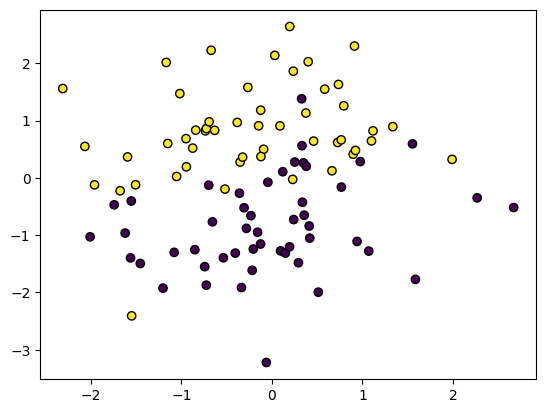

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_b, y_b = make_classification(random_state=2)

plt.scatter(X_b[:, 0], X_b[:, 1], c=y_b, edgecolors="k")

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, random_state=0)
clf = SVC(random_state=0,probability = True).fit(X_b_train, y_b_train)

y_b_pred = clf.predict_proba(X_b_test) 


An actual curve (multiple points in the FPR-TPR space) can be obtained if we predict *probabilities*.

If we predict *labels* directly, we simply obtain a single point in the FPR-TPR space.


In [8]:
y_b_pred

array([[0.3521471 , 0.6478529 ],
       [0.78324698, 0.21675302],
       [0.14000071, 0.85999929],
       [0.16624429, 0.83375571],
       [0.12557431, 0.87442569],
       [0.96866367, 0.03133633],
       [0.20721912, 0.79278088],
       [0.09237574, 0.90762426],
       [0.06247759, 0.93752241],
       [0.03996521, 0.96003479],
       [0.93876115, 0.06123885],
       [0.99385488, 0.00614512],
       [0.13862898, 0.86137102],
       [0.05679315, 0.94320685],
       [0.00695192, 0.99304808],
       [0.01877134, 0.98122866],
       [0.11295862, 0.88704138],
       [0.33581262, 0.66418738],
       [0.01518629, 0.98481371],
       [0.93856993, 0.06143007],
       [0.02198946, 0.97801054],
       [0.93975413, 0.06024587],
       [0.95452817, 0.04547183],
       [0.91801943, 0.08198057],
       [0.44779525, 0.55220475]])

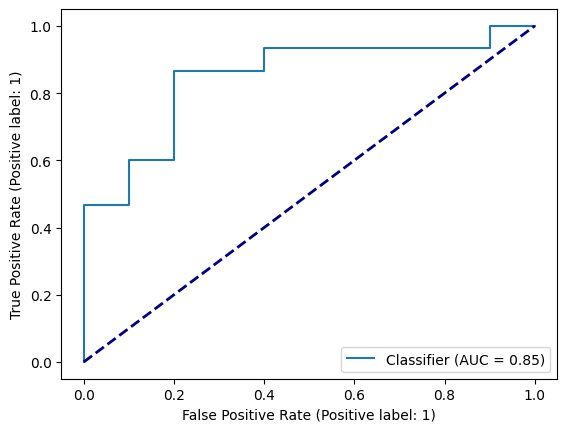

In [9]:
RocCurveDisplay.from_predictions(y_b_test,y_b_pred[:,1]) # display from predictions, (but there is also the "from_estimator" method)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.show()


## Evaluation on Iris Dataset

### Holdout evaluation

In [10]:
pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

Split the dataset in training set and test set.

In [11]:
from sklearn.model_selection import train_test_split
train_test_split?

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)


In [13]:
pd.Series(y_train).value_counts()

2    39
0    34
1    32
dtype: int64

In [14]:
pd.Series(y_test).value_counts()

1    18
0    16
2    11
dtype: int64

Train the classification model based on the training set and predict the labels for the instances in the test set.

In [15]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred = knn.predict(X_test)

Evaluate the performance of the model.

In [16]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

0.9777777777777777


Sanity check: how is accuracy defined?

In [17]:
np.sum(y_test==y_pred)/ len(y_test)

0.9777777777777777

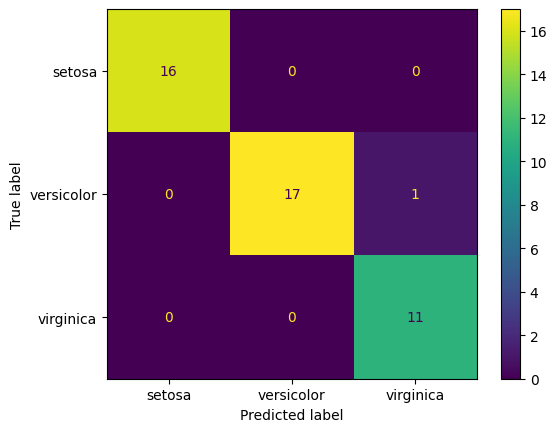

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        y_pred,
                                        display_labels = iris.target_names)
plt.show()

In [19]:
print(classification_report(y_test,y_pred,target_names = iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Optionally, you can get a dictionary from `classification_report`

In [20]:
classification_report(y_test,y_pred,target_names = iris.target_names,output_dict = True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16},
 'versicolor': {'precision': 1.0,
  'recall': 0.9444444444444444,
  'f1-score': 0.9714285714285714,
  'support': 18},
 'virginica': {'precision': 0.9166666666666666,
  'recall': 1.0,
  'f1-score': 0.9565217391304348,
  'support': 11},
 'accuracy': 0.9777777777777777,
 'macro avg': {'precision': 0.9722222222222222,
  'recall': 0.9814814814814815,
  'f1-score': 0.975983436853002,
  'support': 45},
 'weighted avg': {'precision': 0.9796296296296295,
  'recall': 0.9777777777777777,
  'f1-score': 0.9779434092477569,
  'support': 45}}

Note on metrics averaging:
- **macro**: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- **weighted**: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.
- **micro**: Calculate metrics globally by counting the total true positives, false negatives and false positives.


### Cross-validation

In [21]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5,
           shuffle = True,
           random_state = 123
          )

for enu,(train_index, test_index) in enumerate(kf.split(iris.data, iris.target)):
    print()
    print(f'-------------------------------------------fold {enu}')
    print(f'')
    print("TRAIN:",train_index.shape)
    print(train_index)
    print("TEST:", test_index.shape)
    print(test_index)
    print("TEST LABELS:")
    print(iris.target[test_index])
    # train model on the current training set
    # test model on the current test set
    
    print(f'-------------------------------------------end fold {enu}')

# compute average metrics


-------------------------------------------fold 0

TRAIN: (120,)
[  0   1   2   3   5   6   7   9  10  11  12  14  15  16  17  18  19  21
  22  23  25  26  27  29  30  32  34  35  38  39  40  41  43  44  47  48
  49  50  51  52  53  54  55  56  57  58  60  61  62  64  65  66  67  68
  69  70  71  73  74  75  76  77  78  79  80  81  82  83  84  85  86  89
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 107 108 109
 110 111 113 114 115 118 119 120 122 123 124 125 126 128 129 130 131 134
 136 137 139 140 142 143 144 145 146 147 148 149]
TEST: (30,)
[  4   8  13  20  24  28  31  33  36  37  42  45  46  59  63  72  87  88
  90 104 112 116 117 121 127 132 133 135 138 141]
TEST LABELS:
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
-------------------------------------------end fold 0

-------------------------------------------fold 1

TRAIN: (120,)
[  1   2   3   4   6   7   8  10  11  12  13  14  15  17  18  20  21  22
  24  25  26  27  28  30  31  32  33  34  3

Is this behaviour correct?

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Shuffling may be essential to get a meaningful cross-validation result if data ordering is not arbitrary (i.e., same class labels are contiguous).
By default no shuffling occurs, including for the (stratified) K fold cross-validation.

Actually, we do not need to implement the loop above. Indeed, `sklearn` offers specific methods for evaluating models performance in cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(), X, y, cv = KFold(5, shuffle = True, random_state = 123)) 
# note that the default scorer for KNeighborsClassifier is the accuracy score

array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333])

The `cross_validate` function differs from `cross_val_score` in two ways:
- It allows specifying multiple metrics for evaluation.
- It returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, accuracy_score
results = cross_validate(KNeighborsClassifier(), 
                         iris.data,
                         iris.target,
                         scoring = {
                             'fscore': make_scorer(f1_score, average = 'macro'),
                             'accuracy': make_scorer(accuracy_score)},
                         return_estimator = True,
                         cv = KFold(5, shuffle = True, random_state = 123),
                         n_jobs = -1) # Number of jobs to run in parallel. 
                                      # Training the estimator and computing the score are parallelized over the cross-validation splits.
results

{'fit_time': array([0.00100088, 0.00100183, 0.00100017, 0.00146794, 0.00100088]),
 'score_time': array([0.00399923, 0.00472784, 0.00472665, 0.00448585, 0.00100017]),
 'estimator': [KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()],
 'test_fscore': array([0.95520422, 0.96825397, 0.96491228, 0.96102564, 0.94405594]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333])}

How to obtain the ***average* classification report** over cross-validation?

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 123)

list_df = []
list_accuracy = []

k = 1
for train, val in skf.split(iris.data, iris.target):
    print(f'FOLD {k}')
    # fit and predict using classifier
    X_tr = iris.data[train]
    y_tr = iris.target[train]
    X_val = iris.data[val]
    y_val = iris.target[val]
    clf = KNeighborsClassifier()
    clf.fit(X_tr,y_tr)
    y_pred = clf.predict(X_val)
    # compute classification report
    cr = classification_report(y_val,y_pred,output_dict = True)
    print(classification_report(y_val,y_pred))
    # store accuracy
    list_accuracy.append(cr['accuracy'])
    # store per-class metrics as a dataframe
    df = pd.DataFrame({k:v for k,v in cr.items() if k!='accuracy'})
    display(df)
    list_df.append(df)
    k+=1
    

# compute average per-class metrics    
df_concat = pd.concat(list_df)
grouped_by_row_index = df_concat.groupby(df_concat.index)
df_avg = grouped_by_row_index.mean()

# compute average accuracy
accuracy_avg = np.mean(list_accuracy)

FOLD 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



,0,1,2,macro avg,weighted avg
precision,1.0,1.000000,0.909091,0.969697,0.969697
recall,1.0,0.900000,1.000000,0.966667,0.966667
f1-score,1.0,0.947368,0.952381,0.966583,0.966583
support,10.0,10.000000,10.000000,30.000000,30.000000


FOLD 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,0,1,2,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,10.0,10.0,10.0,30.0,30.0


FOLD 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



,0,1,2,macro avg,weighted avg
precision,1.0,1.000000,0.909091,0.969697,0.969697
recall,1.0,0.900000,1.000000,0.966667,0.966667
f1-score,1.0,0.947368,0.952381,0.966583,0.966583
support,10.0,10.000000,10.000000,30.000000,30.000000


FOLD 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



,0,1,2,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,10.0,10.0,10.0,30.0,30.0


FOLD 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



,0,1,2,macro avg,weighted avg
precision,1.0,0.9,0.9,0.933333,0.933333
recall,1.0,0.9,0.9,0.933333,0.933333
f1-score,1.0,0.9,0.9,0.933333,0.933333
support,10.0,10.0,10.0,30.000000,30.000000


In [26]:
accuracy_avg

0.9733333333333334

In [27]:
df_avg

,0,1,2,macro avg,weighted avg
f1-score,1.0,0.958947,0.960952,0.973300,0.973300
precision,1.0,0.980000,0.943636,0.974545,0.974545
recall,1.0,0.940000,0.980000,0.973333,0.973333
support,10.0,10.000000,10.000000,30.000000,30.000000


## Feature Selection
Feature selection/ dimensionality reduction can be used either to improve estimators' accuracy scores or to boost their performance on very high-dimensional datasets.



### A baseline: Variance threshold



Removes all features whose variance doesn’t meet some threshold. 

In [28]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [29]:
from sklearn.preprocessing import MinMaxScaler
X_normalized = MinMaxScaler().fit_transform(X_train)
X_normalized[:10,:] # display just the first ten rows

array([[0.19444444, 0.        , 0.4137931 , 0.375     ],
       [0.61111111, 0.41666667, 0.75862069, 0.70833333],
       [0.66666667, 0.54166667, 0.79310345, 1.        ],
       [0.47222222, 0.08333333, 0.67241379, 0.58333333],
       [0.66666667, 0.20833333, 0.81034483, 0.70833333],
       [0.36111111, 0.20833333, 0.48275862, 0.41666667],
       [0.94444444, 0.41666667, 0.86206897, 0.91666667],
       [0.55555556, 0.54166667, 0.62068966, 0.625     ],
       [0.33333333, 0.16666667, 0.46551724, 0.41666667],
       [0.55555556, 0.29166667, 0.65517241, 0.70833333]])

In [30]:
X_normalized.var(axis=0)

array([0.05876347, 0.03349805, 0.09588197, 0.10464601])

In [31]:
from sklearn.feature_selection import VarianceThreshold
fsel = VarianceThreshold(threshold = 0.05)
fsel.fit_transform(X_normalized)[:10,:] # display just the first ten rows


array([[0.19444444, 0.4137931 , 0.375     ],
       [0.61111111, 0.75862069, 0.70833333],
       [0.66666667, 0.79310345, 1.        ],
       [0.47222222, 0.67241379, 0.58333333],
       [0.66666667, 0.81034483, 0.70833333],
       [0.36111111, 0.48275862, 0.41666667],
       [0.94444444, 0.86206897, 0.91666667],
       [0.55555556, 0.62068966, 0.625     ],
       [0.33333333, 0.46551724, 0.41666667],
       [0.55555556, 0.65517241, 0.70833333]])

### Univariate feature selection
Univariate feature selection works by examining each feature individually: the best features are selected based on univariate statistical tests. 

Scikit-learn exposes feature selection routines as objects that implement the *transform* method. The most popular *selection routines* are the following:
- `SelectKBest`: Select features according to the *k* highest scores.
- `SelectPercentile`: Select features according to a percentile of the highest scores (percent of features to keep).

These selection routines take as input a *scoring function* that returns univariate scores:
- classification
    - `chi2`: Compute chi-squared stats between each non-negative feature and class.
    - `f_classif`: Compute the ANOVA F-value for the provided sample. (*Note: F-test captures only linear dependency*)
    - `mutual_info_classif`: Estimate mutual information for a discrete target variable. (*Note: mutual information can capture any kind of dependency between variables*)
- regression
    - `f_regression`: Univariate linear regression tests returning F-statistic and p-values.
    - `mutual_info_regression`: Estimate mutual information for a continuous target variable.



A practical example.

In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(32).uniform(0, 0.1, size=(X.shape[0], 20))
# Add the noisy data to the informative features
X = np.hstack((X, E))
display(pd.DataFrame(X))
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.1,3.5,1.4,0.2,0.085889,0.037271,0.055513,0.095566,0.073667,0.081621,...,0.009178,0.034519,0.066275,0.044171,0.055149,0.070371,0.058940,0.004993,0.056179,0.076636
1,4.9,3.0,1.4,0.2,0.091091,0.009291,0.090252,0.046096,0.045202,0.099943,...,0.003515,0.053489,0.016650,0.030841,0.004506,0.023858,0.067483,0.078238,0.069520,0.032895
2,4.7,3.2,1.3,0.2,0.049403,0.052412,0.029854,0.046311,0.098478,0.050113,...,0.029002,0.078907,0.045712,0.000693,0.041934,0.033067,0.060415,0.032462,0.098125,0.058823
3,4.6,3.1,1.5,0.2,0.013109,0.052098,0.035798,0.001500,0.009643,0.078423,...,0.027070,0.012982,0.047272,0.039063,0.040508,0.037615,0.029217,0.055288,0.043119,0.078376
4,5.0,3.6,1.4,0.2,0.070077,0.077641,0.028783,0.021031,0.050411,0.013313,...,0.062573,0.063432,0.053294,0.073539,0.081517,0.037486,0.080492,0.087965,0.058689,0.065585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.063802,0.044238,0.085260,0.001071,0.075947,0.018392,...,0.080565,0.055276,0.047896,0.045679,0.043318,0.067997,0.031090,0.078443,0.067694,0.062368
146,6.3,2.5,5.0,1.9,0.043094,0.042293,0.004353,0.088163,0.021030,0.004195,...,0.061941,0.082326,0.021805,0.072496,0.011366,0.015713,0.012002,0.054378,0.078589,0.046266
147,6.5,3.0,5.2,2.0,0.013167,0.018853,0.098990,0.015766,0.084924,0.089570,...,0.079186,0.093835,0.069781,0.077314,0.002414,0.001544,0.094837,0.094654,0.062991,0.065031
148,6.2,3.4,5.4,2.3,0.034649,0.049357,0.012220,0.085819,0.098354,0.014587,...,0.050521,0.067844,0.040648,0.081789,0.068055,0.092150,0.010276,0.047234,0.063930,0.093585


Text(0.5, 1.0, 'column 4')

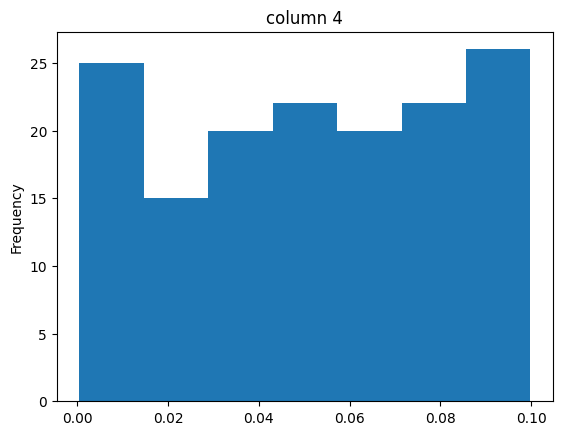

In [66]:
pd.DataFrame(X)[4].plot(kind = 'hist',bins = 7)
plt.title('column 4')

In [67]:
X_train.shape, X_test.shape

((112, 24), (38, 24))

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)


SelectKBest(k=4)

In [69]:
f_classif?

The *f_classif* function evaluates the one-way ANOVA test.

The one-way ANOVA tests the null hypothesis that 2 or more groups have    the same population mean. The test is applied to samples from two or     more groups, possibly with differing sizes. 

In our setting, the *groups* are the sets of samples belonging to a given class. Intuitively, if, for a given feature, the sets of samples belonging to different classes have the same mean, than that feature is not "useful".

In [70]:
f_statistics, p_values = f_classif(X[:,:2],y)
print(f'f-stat Att.0: {f_statistics[0]:.4}  -  p-value Att.0: {p_values[0]:.3}')
print(f'f-stat Att.1: {f_statistics[1]:.4}  -  p-value Att.1: {p_values[1]:.3}')


f-stat Att.0: 119.3  -  p-value Att.0: 1.67e-31
f-stat Att.1: 49.16  -  p-value Att.1: 4.49e-17


For the first two attributes, the p-value is close to zero. With a level of significance $\alpha$ (e.g. $\alpha = 0.05$) we can reject the null hypothesis --> the three groups (one per class) have different mean --> the feature is "useful" and should be retained.

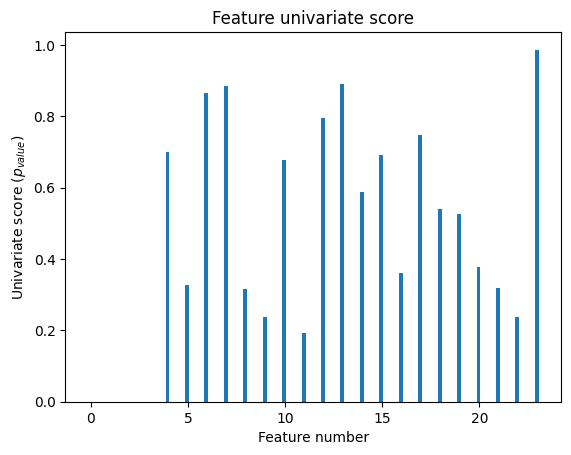

In [46]:
X_indices = np.arange(X.shape[-1])
plt.bar(X_indices - 0.05, selector.pvalues_, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($p_{value}$)")
plt.show()

In [48]:
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

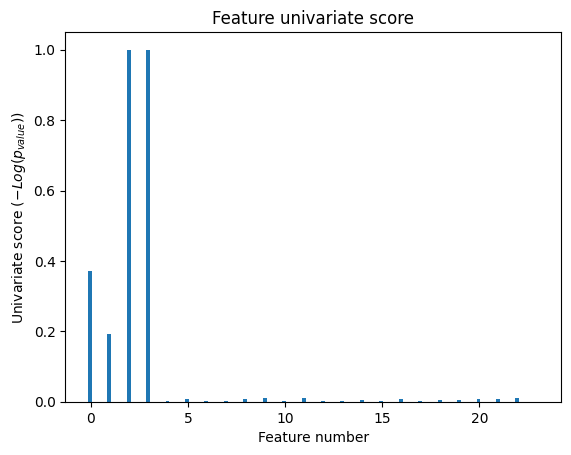

In [49]:
X_indices = np.arange(X.shape[-1])
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [50]:
X_out = selector.transform(X_train)
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(X_out).head())

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.0,2.0,3.5,1.0,0.008407,0.032423,0.001000,0.055466,0.095411,0.070884,...,0.077037,0.059674,0.030528,0.006279,0.087363,0.003562,0.006364,0.099265,0.034852,0.065962
1,4.9,3.0,1.4,0.2,0.091091,0.009291,0.090252,0.046096,0.045202,0.099943,...,0.003515,0.053489,0.016650,0.030841,0.004506,0.023858,0.067483,0.078238,0.069520,0.032895
2,4.4,2.9,1.4,0.2,0.036902,0.068853,0.062160,0.078923,0.008564,0.005167,...,0.021172,0.091845,0.018953,0.023671,0.014105,0.018984,0.070037,0.056722,0.071706,0.016743
3,5.0,2.3,3.3,1.0,0.053134,0.030910,0.072807,0.018478,0.046550,0.026775,...,0.057394,0.048638,0.015598,0.078421,0.080969,0.095683,0.000787,0.093280,0.041715,0.054997
4,4.9,2.5,4.5,1.7,0.067322,0.085248,0.052598,0.089712,0.060825,0.077096,...,0.064801,0.000805,0.098850,0.078648,0.025627,0.010826,0.032955,0.008774,0.018743,0.063714


,0,1,2,3
0,5.0,2.0,3.5,1.0
1,4.9,3.0,1.4,0.2
2,4.4,2.9,1.4,0.2
3,5.0,2.3,3.3,1.0
4,4.9,2.5,4.5,1.7


In [51]:
selector.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3'], dtype=object)

### Recursive feature elimination (RFE)
Suppose you can rely on an external estimator (classification/regression model) that assigns weights to features.

In RFE, first the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (e.g., `coef_`, `feature_importances_`)  or callable. Then, the least important feature (or features, if a step>1 is used) is pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000) 
# LogisticRegression has attribute "coef_", indicating coefficient of the features in the decision function.
rfe = RFE(estimator=lr, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
rfe.ranking_


array([ 4,  3,  1,  2, 15, 24, 17, 23, 22, 12, 21, 11, 19,  5, 14, 16, 10,
       13,  8,  6,  7,  9, 20, 18])

### Feature selection using `SelectFromModel`

SelectFromModel is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as `coef_`, `feature_importances_`) or via an `importance_getter` callable after fitting. The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter (or via other built-in heuristics).

Differently from RFE, `SelectFromModel` involves no iteration.


### Sequential Feature Selection (SFS)

It can be either forward or backward:
- *Forward-SFS* is a greedy procedure that iteratively finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that **maximizes a cross-validated score** when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the `n_features_to_select` parameter.
- *Backward-SFS* follows the same idea but works in the opposite direction: instead of starting with no features and greedily adding features, we start with all the features and greedily remove features from the set. The direction parameter controls whether forward or backward SFS is used.


As it relies on a cross-validated score for selecting the best feature at each iteration, SFS differs from RFE and SelectFromModel in that it does not require the underlying model to expose a `coef_` or `feature_importances_` attribute. It may however be slower considering that more models need to be evaluated, compared to the other approaches.




In [53]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.0,2.0,3.5,1.0,0.008407,0.032423,0.001000,0.055466,0.095411,0.070884,...,0.077037,0.059674,0.030528,0.006279,0.087363,0.003562,0.006364,0.099265,0.034852,0.065962
1,4.9,3.0,1.4,0.2,0.091091,0.009291,0.090252,0.046096,0.045202,0.099943,...,0.003515,0.053489,0.016650,0.030841,0.004506,0.023858,0.067483,0.078238,0.069520,0.032895
2,4.4,2.9,1.4,0.2,0.036902,0.068853,0.062160,0.078923,0.008564,0.005167,...,0.021172,0.091845,0.018953,0.023671,0.014105,0.018984,0.070037,0.056722,0.071706,0.016743
3,5.0,2.3,3.3,1.0,0.053134,0.030910,0.072807,0.018478,0.046550,0.026775,...,0.057394,0.048638,0.015598,0.078421,0.080969,0.095683,0.000787,0.093280,0.041715,0.054997
4,4.9,2.5,4.5,1.7,0.067322,0.085248,0.052598,0.089712,0.060825,0.077096,...,0.064801,0.000805,0.098850,0.078648,0.025627,0.010826,0.032955,0.008774,0.018743,0.063714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5.6,3.0,4.5,1.5,0.095764,0.084037,0.098592,0.027242,0.045610,0.017594,...,0.028410,0.089656,0.027644,0.095602,0.000257,0.014435,0.072215,0.005292,0.083675,0.001019
108,4.7,3.2,1.6,0.2,0.086868,0.062618,0.076539,0.039049,0.093585,0.034067,...,0.052709,0.082726,0.009826,0.043018,0.032053,0.035208,0.072241,0.036238,0.044836,0.076131
109,7.4,2.8,6.1,1.9,0.094457,0.034413,0.091462,0.040413,0.003479,0.033816,...,0.054764,0.048690,0.067696,0.056622,0.087926,0.056846,0.098286,0.031396,0.051722,0.031439
110,6.9,3.1,5.1,2.3,0.099200,0.099441,0.089466,0.029368,0.012754,0.088862,...,0.092964,0.002335,0.001411,0.086829,0.012567,0.023855,0.019008,0.029453,0.099989,0.012572


In [54]:
from sklearn.feature_selection import SequentialFeatureSelector

In [55]:
skf

StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [56]:
lr = LogisticRegression(max_iter = 1000)
sfs = SequentialFeatureSelector(lr, 
                                cv = skf,
                                scoring = 'accuracy', 
                                direction='forward', 
                                n_features_to_select=4)
sfs.fit(X_train, y_train)

sfs.get_support()

array([False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [57]:
lr = LogisticRegression(max_iter = 1000)
sfs = SequentialFeatureSelector(lr,
                                cv = skf, 
                                scoring = 'accuracy',  
                                direction='backward', 
                                n_features_to_select=4)
sfs.fit(X_train, y_train)

sfs.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True])

**Note 1**: Which one takes the longest and why?

In [58]:
%%timeit

lr = LogisticRegression(max_iter = 1000)
sfs = SequentialFeatureSelector(lr, 
                                cv = skf,
                                scoring = 'accuracy', 
                                direction='forward', 
                                n_features_to_select=4)
sfs.fit(X_train, y_train)

sfs.get_support()

1.59 s ± 74.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%%timeit

lr = LogisticRegression(max_iter = 1000)
sfs = SequentialFeatureSelector(lr, 
                                cv = skf, 
                                scoring = 'accuracy', 
                                direction='backward', 
                                n_features_to_select=4)
sfs.fit(X_train, y_train)

sfs.get_support()

9.07 s ± 600 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Note 2**: Why do we have noisy features among the selected ones?

Check manually the first step, e.g. in the forward fashion.

In [71]:
for i in range(X_train.shape[1]):
    print(np.mean(cross_val_score(LogisticRegression(max_iter = 1000), 
                                  X_train[:,i].reshape(-1, 1),
                                  y_train, 
                                  cv = skf)))


0.7494071146245058
0.5462450592885375
0.9375494071146244
0.9644268774703558
0.30316205533596835
0.3387351778656126
0.30316205533596835
0.25968379446640316
0.2952569169960474
0.3387351778656126
0.2675889328063241
0.30434782608695654
0.36561264822134387
0.28616600790513835
0.34703557312252964
0.33833992094861653
0.3395256916996047
0.2683794466403162
0.3391304347826087
0.35612648221343873
0.33794466403162055
0.38300395256916997
0.33794466403162055
0.2865612648221344


The highest score (around 0.96) is obtained for the fourth attribute (index = 3).

Evaluate the second step: which feature should be added? (i.e., which one improves most the cross-val-score?)

In [74]:
for i in range(X_train.shape[1]):
    if i == 3:
        continue
    X_new = np.concatenate((X_train[:,i].reshape(-1, 1),(X_train[:,3].reshape(-1, 1))),axis = 1)
    print(i,np.mean(cross_val_score(LogisticRegression(max_iter = 1000), 
                                    X_new,
                                    y_train, 
                                    cv = skf)))

0 0.9379446640316207
1 0.9379446640316207
2 0.9466403162055336
4 0.9644268774703558
5 0.9644268774703558
6 0.9644268774703558
7 0.9644268774703558
8 0.9644268774703558
9 0.9644268774703558
10 0.9644268774703558
11 0.9644268774703558
12 0.9644268774703558
13 0.9644268774703558
14 0.9644268774703558
15 0.9644268774703558
16 0.9644268774703558
17 0.9644268774703558
18 0.9644268774703558
19 0.9644268774703558
20 0.9644268774703558
21 0.9644268774703558
22 0.9644268774703558
23 0.9644268774703558


It seems that, in our setting, the other actual features from the Iris dataset (X0, X1, X2) worsen the prediction, rather than improving it. That's why, if we set the target number of features to be selected to 4, the algorithm favors the noisy ones.

By setting an even minimum tolerance value (features are selected until the score improvement does not exceed such a threshold), the behavior is as expected.

In [75]:
lr = LogisticRegression(max_iter = 1000)
sfs = SequentialFeatureSelector(lr, 
                                cv = skf, 
                                tol = 0.0000001, 
                                scoring = 'accuracy',  
                                direction='forward', 
                                n_features_to_select='auto')
sfs.fit(X_train, y_train)

sfs.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])